## Mounted the google drive to load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data description for the file 'data.csv'

#### About the data
This data have the daily sales records of 5 products for two bakery stores. The data gathered represent the sales in a whole year. In addition to that, the prediction of the AI for each each day is included.

#### Data fields

* **date**: The date of the sales record
* **item_id**: The item id of the product as used in the database
* **name**: The name of the product
* **unit_price**: The price of a single piece of the product in Euros.
* **waste**: The quantity in pieces of the product went to waste at the end of the day.
* **sales_qntty**: The quantity in pieces of what the store have sold during the day.
* **category**: To which category does this product belonges to
* **store_name**: The name of the bakery store
* **prediction**: The prediction by the AI of the expected quantity to be sold on a given day.

## Data Loading

In [ ]:
# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# load the data and convert the date column into date data type
data = pd.read_csv('/content/drive/MyDrive/data.csv')
data

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction
0,2020-06-02,102,Schnittbrötchen,0.36,19.0,383.0,Ebbis und Schnittbrötchen,one,370.687347
1,2020-06-03,102,Schnittbrötchen,0.36,0.0,360.0,Ebbis und Schnittbrötchen,one,331.705994
2,2020-06-04,102,Schnittbrötchen,0.36,53.0,353.0,Ebbis und Schnittbrötchen,one,350.590912
3,2020-06-02,121,Mehrkornbrötchen,0.70,41.0,120.0,Gemischte Brötchen,one,84.045364
4,2020-06-03,121,Mehrkornbrötchen,0.70,0.0,92.0,Gemischte Brötchen,one,80.833221
...,...,...,...,...,...,...,...,...,...
3244,2021-05-31,102,Schnittbrötchen,0.36,27.0,340.0,Ebbis und Schnittbrötchen,two,365.815094
3245,2021-05-31,121,Mehrkornbrötchen,0.70,27.0,42.0,Gemischte Brötchen,two,67.243301
3246,2021-05-31,101,Ebbi,0.40,68.0,155.0,Ebbis und Schnittbrötchen,two,180.313950
3247,2021-05-31,268,Der Ebbing - MK Brot,3.40,8.5,16.5,Brote,two,19.608158


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3249 non-null   object 
 1   item_id      3249 non-null   int64  
 2   name         3249 non-null   object 
 3   unit_price   3249 non-null   float64
 4   waste        3249 non-null   float64
 5   sales_qntty  3249 non-null   float64
 6   category     3249 non-null   object 
 7   store_name   3249 non-null   object 
 8   prediction   3249 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 228.6+ KB


Converted all columns representing quantities to integer values using the ceiling function, as quantities are typically whole numbers.

In [ ]:
# used  ceiling  function.
data[['prediction', 'waste', 'sales_qntty']] = np.ceil(data[['prediction', 'waste', 'sales_qntty']]).astype(int)
data

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction
0,2020-06-02,102,Schnittbrötchen,0.36,19,383,Ebbis und Schnittbrötchen,one,371
1,2020-06-03,102,Schnittbrötchen,0.36,0,360,Ebbis und Schnittbrötchen,one,332
2,2020-06-04,102,Schnittbrötchen,0.36,53,353,Ebbis und Schnittbrötchen,one,351
3,2020-06-02,121,Mehrkornbrötchen,0.70,41,120,Gemischte Brötchen,one,85
4,2020-06-03,121,Mehrkornbrötchen,0.70,0,92,Gemischte Brötchen,one,81
...,...,...,...,...,...,...,...,...,...
3244,2021-05-31,102,Schnittbrötchen,0.36,27,340,Ebbis und Schnittbrötchen,two,366
3245,2021-05-31,121,Mehrkornbrötchen,0.70,27,42,Gemischte Brötchen,two,68
3246,2021-05-31,101,Ebbi,0.40,68,155,Ebbis und Schnittbrötchen,two,181
3247,2021-05-31,268,Der Ebbing - MK Brot,3.40,9,17,Brote,two,20


In [ ]:
data.isnull().sum()

date           0
item_id        0
name           0
unit_price     0
waste          0
sales_qntty    0
category       0
store_name     0
prediction     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3249 non-null   object 
 1   item_id      3249 non-null   int64  
 2   name         3249 non-null   object 
 3   unit_price   3249 non-null   float64
 4   waste        3249 non-null   int64  
 5   sales_qntty  3249 non-null   int64  
 6   category     3249 non-null   object 
 7   store_name   3249 non-null   object 
 8   prediction   3249 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 228.6+ KB


Converted the data type of the date column from object to date.

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3249 non-null   datetime64[ns]
 1   item_id      3249 non-null   int64         
 2   name         3249 non-null   object        
 3   unit_price   3249 non-null   float64       
 4   waste        3249 non-null   int64         
 5   sales_qntty  3249 non-null   int64         
 6   category     3249 non-null   object        
 7   store_name   3249 non-null   object        
 8   prediction   3249 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 228.6+ KB


## **1. What are the start and end dates of the data?**

In [ ]:
# 1. what are the start and end dates of the data?
initial_date = data['date'].min()
last_date = data['date'].max()
print("starting date:", initial_date)
print("ending date:", last_date)

starting date: 2020-06-02 00:00:00
ending date: 2021-05-31 00:00:00


## **2. Show a summary table of the sales and wastes of each store. The summary of each store should show the total waste and sales in euros for the whole year.**

In [ ]:
# explored the  data
data.sample(5)

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction
82,2020-06-24,102,Schnittbrötchen,0.36,21,367,Ebbis und Schnittbrötchen,one,344
341,2020-08-20,101,Ebbi,0.40,13,266,Ebbis und Schnittbrötchen,one,307
996,2021-01-26,268,Der Ebbing - MK Brot,3.40,6,26,Brote,one,29
1722,2020-07-15,121,Mehrkornbrötchen,0.70,28,57,Gemischte Brötchen,two,52
2791,2021-02-24,102,Schnittbrötchen,0.36,56,269,Ebbis und Schnittbrötchen,two,331


### Summary  report  of **TOTAL items**  sold  by  each  store in the entire TIME duration.

In [ ]:
data['cost_price'] = data['unit_price']*0.5 # created new column cost_price that is production cost

In [ ]:
# groupped by store_name and aggregate required fields
summary_table = data.groupby('store_name').agg({'waste': 'sum', 'unit_price': 'sum', 'sales_qntty': 'sum', 'cost_price': 'sum', 'prediction': 'sum'})

summary_table['produced'] = summary_table['waste'] + summary_table['sales_qntty'] # calculated total production
summary_table['Ai_difference'] = (summary_table['produced'] - summary_table['prediction']).abs() # calculated the difference with AI prediction
summary_table['total_sales'] = data.groupby('store_name').apply(lambda x: (x['unit_price'] * x['sales_qntty']).sum()).values # calculated total sales in Euros
summary_table['waste_loss_money'] = data.groupby('store_name').apply(lambda x: (x['waste'] * x['cost_price']).sum()).values # calculated loss money because of waste
summary_table = summary_table.rename(columns={'waste': 'Waste_quantity', 'total_sales': 'Total Sales (Euros)', 'waste_loss_money': 'Waste Loss (Euros)'}) # renamed columns
summary_table = summary_table.drop(columns=['unit_price']) # dropped unnecessary column

print("\nSummary table of sales and waste of each store for all items:")
summary_table


Summary table of sales and waste of each store for all items:


,Waste_quantity,sales_qntty,cost_price,prediction,produced,Ai_difference,Total Sales (Euros),Waste Loss (Euros)
store_name,,,,,,,,
one,36833,285172,884.86,297730,322005,24275,150490.34,8628.15
two,48919,286866,956.67,296960,335785,38825,142098.54,11811.44


### Summary  report  of **each item**  sold  by  each   store in the entire TIME duration.

In [ ]:
def create_summary_table(data):
    data['cost_price'] = data['unit_price']*0.5     # calculated the cost price
    summary_table = data.groupby('name').agg({'waste': 'sum', 'sales_qntty': 'sum', 'prediction': 'sum'})  # groupped by 'name' and aggregate necessary fields
    summary_table['produced'] = summary_table['waste'] + summary_table['sales_qntty'] # calculated total production
    summary_table['Ai_difference'] = (summary_table['produced'] - summary_table['prediction']).abs() # calculated the difference with AI prediction
    summary_table['Total Sales (Euros)'] = data.groupby('name').apply(lambda x: (x['unit_price'] * x['sales_qntty']).sum()).values # calculated total sales in Euros
    summary_table['Waste Loss (Euros)'] = data.groupby('name').apply(lambda x: (x['waste'] * x['cost_price']).sum()).values # calculated loss money because of waste
    summary_table = summary_table.rename(columns={'waste': 'Waste_quantity'}) # renamed columns
    return summary_table

In [ ]:
# filtered data for each store
store_1 = data[data['store_name'] == 'one']
store_2 = data[data['store_name'] == 'two']

# created summary tables for each store
summary_table_store_1 = create_summary_table(store_1)
summary_table_store_2 = create_summary_table(store_2)

<ipython-input-13-6e42f2972f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cost_price'] = data['unit_price']*0.5     # calculated the cost price
<ipython-input-13-6e42f2972f3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cost_price'] = data['unit_price']*0.5     # calculated the cost price


In [ ]:
# added MultiIndex of store names to separate
summary_table_store_1.index = pd.MultiIndex.from_product([['one'], summary_table_store_1.index])
summary_table_store_2.index = pd.MultiIndex.from_product([['two'], summary_table_store_2.index])

# joined summary tables
summary_table_combined = pd.concat([summary_table_store_1, summary_table_store_2])

# Print combined summary table of sales and waste for both stores
print("\nCombined summary table of sales and waste for both stores:")
summary_table_combined


Combined summary table of sales and waste for both stores:


Waste_quantity  sales_qntty  prediction  produced  \
    name                                                                      
one Der Ebbing - MK Brot             395         7801        8231      8196   
    Ebbi                           14280       107009      112579    121289   
    Laugenstangen                   1756        15509       16105     17265   
    Mehrkornbrötchen                3237        29139       29731     32376   
    Schnittbrötchen                17165       125714      131084    142879   
two Der Ebbing - MK Brot             897         5483        5704      6380   
    Ebbi                           17607        79206       81831     96813   
    Laugenstangen                   2254        16145       16582     18399   
    Mehrkornbrötchen                3348        25463       26146     28811   
    Schnittbrötchen                24813       160569      166697    185382   

                          Ai_difference  Total Sales (Euros)  \
    name                                                       
one Der Ebbing - MK Brot             35             26523.40   
    Ebbi                           8710             42803.60   
    Laugenstangen                  1160             15509.00   
    Mehrkornbrötchen               2645             20397.30   
    Schnittbrötchen               11795             45257.04   
two Der Ebbing - MK Brot            676             18642.20   
    Ebbi                          14982             31682.40   
    Laugenstangen                  1817             16145.00   
    Mehrkornbrötchen               2665             17824.10   
    Schnittbrötchen               18685             57804.84   

                          Waste Loss (Euros)  
    name                                      
one Der Ebbing - MK Brot              671.50  
    Ebbi                             2856.00  
    Laugenstangen                     878.00  
    Mehrkornbrötchen                 1132.95  
    Schnittbrötchen                  3089.70  
two Der Ebbing - MK Brot             1524.90  
    Ebbi                             3521.40  
    Laugenstangen                    1127.00  
    Mehrkornbrötchen                 1171.80  
    Schnittbrötchen                  4466.34

## **3. Show the day with most sales of Schnittbrötchen (item_id = 102).**

In [ ]:
# 3. show the day with most sales of Schnittbrötchen (item_id = 102)

# filterd  the  datframe for  the item_id = 102
schnittbroetchen_data = data[data['item_id'] == 102]

# sorted the data by  Descending order of SALES QUANTITY
sorted_data = schnittbroetchen_data.sort_values(by='sales_qntty', ascending=False)

# created the dateframe to fetch most  selling  date.
i = 5
top_days = sorted_data.head(i)[['date','sales_qntty']]
for day in top_days['date']:
    y = day
    break
print("Day with most sales of Schnittbrötchen : {} ".format(y))
print("\nTop {} days with most sales of Schnittbrötchen".format(i))
top_days

Day with most sales of Schnittbrötchen : 2020-08-08 00:00:00 

Top 5 days with most sales of Schnittbrötchen


,date,sales_qntty
285,2020-08-08,914
2968,2021-04-03,908
1933,2020-08-29,897
3227,2021-05-29,895
3060,2021-04-24,848


## **4. Show the record with the worst prediction in Euros**

In [ ]:
# 4. show the record with the worst prediction in Euros
data['Ai_sale_difference'] = (data['sales_qntty'] - data['prediction']).abs() # created  new column to check the  difference
data

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction,cost_price,Ai_sale_difference
0,2020-06-02,102,Schnittbrötchen,0.36,19,383,Ebbis und Schnittbrötchen,one,371,0.18,12
1,2020-06-03,102,Schnittbrötchen,0.36,0,360,Ebbis und Schnittbrötchen,one,332,0.18,28
2,2020-06-04,102,Schnittbrötchen,0.36,53,353,Ebbis und Schnittbrötchen,one,351,0.18,2
3,2020-06-02,121,Mehrkornbrötchen,0.70,41,120,Gemischte Brötchen,one,85,0.35,35
4,2020-06-03,121,Mehrkornbrötchen,0.70,0,92,Gemischte Brötchen,one,81,0.35,11
...,...,...,...,...,...,...,...,...,...,...,...
3244,2021-05-31,102,Schnittbrötchen,0.36,27,340,Ebbis und Schnittbrötchen,two,366,0.18,26
3245,2021-05-31,121,Mehrkornbrötchen,0.70,27,42,Gemischte Brötchen,two,68,0.35,26
3246,2021-05-31,101,Ebbi,0.40,68,155,Ebbis und Schnittbrötchen,two,181,0.20,26
3247,2021-05-31,268,Der Ebbing - MK Brot,3.40,9,17,Brote,two,20,1.70,3


In [ ]:
# Here worse is considered as the  highest  difference between actual sale and prediction
worst_prediction_record = data.loc[data['Ai_sale_difference'].idxmax()]
print("\nRecord with the worst prediction in Euros:")
print(worst_prediction_record)

# Sort the data by 'Ai_diffrence' column in descending order
data.sort_values(by='Ai_sale_difference', ascending=False).head(5)


Record with the worst prediction in Euros:
date                        2021-02-07 00:00:00
item_id                                     102
name                            Schnittbrötchen
unit_price                                 0.36
waste                                       559
sales_qntty                                 273
category              Ebbis und Schnittbrötchen
store_name                                  two
prediction                                  541
cost_price                                 0.18
Ai_sale_difference                          268
Name: 2697, dtype: object


,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction,cost_price,Ai_sale_difference
2697,2021-02-07,102,Schnittbrötchen,0.36,559,273,Ebbis und Schnittbrötchen,two,541,0.18,268
285,2020-08-08,102,Schnittbrötchen,0.36,12,914,Ebbis und Schnittbrötchen,one,667,0.18,247
3228,2021-05-30,102,Schnittbrötchen,0.36,0,560,Ebbis und Schnittbrötchen,two,761,0.18,201
3172,2021-05-15,102,Schnittbrötchen,0.36,125,566,Ebbis und Schnittbrötchen,two,750,0.18,184
1895,2020-08-22,102,Schnittbrötchen,0.36,56,660,Ebbis und Schnittbrötchen,two,836,0.18,176


## **5. Do the stores sell more products in winter or summer?**

I've categorized *December, January, and February* as **winter** months, and *June, July, and August* as **summer** months.

In [ ]:
# 5. do the stores sell more products in winter or summer?

# filtered the data according to the seasons and  applied sum aggregate on sales quantity column.
winter_sales = data[(data['date'].dt.month >= 12) | (data['date'].dt.month <= 2)]['sales_qntty'].sum() #Winter month filter
summer_sales = data[(data['date'].dt.month >= 6) & (data['date'].dt.month <= 8)]['sales_qntty'].sum() #summer month filter

print("Sales in Winter months is : ",winter_sales)
print("Sales in Summer months is : ",summer_sales)
per_difference = (winter_sales - summer_sales) / summer_sales * 100
print("Winter Sales are {}% more than Summer sales.".format(per_difference.round(3)))

Sales in Winter months is :  141057
Sales in Summer months is :  139229
Winter Sales are 1.313% more than Summer sales.


## **6. Show a plot (line plot) of the sales and predictions in quantity for the period between 11.1.2021 and 17.1.2021 for the product Mehrkornbrötchen(item_id = 121) within the second store.**

In [ ]:
# 6. show a plot (line plot) of the sales and predictions in quantity for the
# period between 11.1.2021 and 17.1.2021 for the product Mehrkornbrötchen
# (item_id = 121) within the second store.

# filted the  data as the  required duration and sotre  for the  perticular  item.
Jan_week = data[(data['date'] >= '2021-01-11') & (data['date'] <= '2021-01-17') & (data['item_id'] == 121) & (data['store_name'] == 'two')]
Jan_week

,date,item_id,name,unit_price,waste,sales_qntty,category,store_name,prediction,cost_price,Ai_sale_difference
2581,2021-01-11,121,Mehrkornbrötchen,0.7,17,63,Gemischte Brötchen,two,61,0.35,2
2582,2021-01-12,121,Mehrkornbrötchen,0.7,0,63,Gemischte Brötchen,two,53,0.35,10
2583,2021-01-13,121,Mehrkornbrötchen,0.7,32,48,Gemischte Brötchen,two,51,0.35,3
2584,2021-01-14,121,Mehrkornbrötchen,0.7,3,63,Gemischte Brötchen,two,65,0.35,2
2601,2021-01-15,121,Mehrkornbrötchen,0.7,0,79,Gemischte Brötchen,two,78,0.35,1
2602,2021-01-16,121,Mehrkornbrötchen,0.7,0,112,Gemischte Brötchen,two,110,0.35,2
2603,2021-01-17,121,Mehrkornbrötchen,0.7,24,75,Gemischte Brötchen,two,85,0.35,10


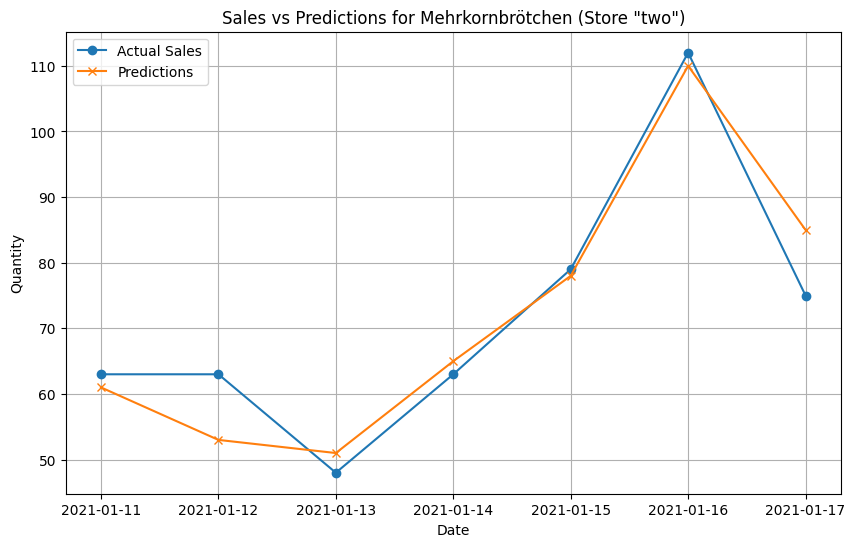

In [ ]:
# plotted LINE plot of the given duration.
plt.figure(figsize=(10, 6))
plt.plot(Jan_week['date'], Jan_week['sales_qntty'], marker='o', label='Actual Sales')
plt.plot(Jan_week['date'], Jan_week['prediction'], marker='x', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales vs Predictions for Mehrkornbrötchen (Store \"two\")')
plt.legend()
plt.grid(True)
plt.show()

## **7. on which days of the week is each store open?**

In [ ]:
# 7. on which days of the week is each store open?

# created day name column
data['day_name'] = data['date'].dt.day_name()

# filtered all the  unique day names from the  day_name column and created datafram.
store_open_days = data.groupby('store_name')['day_name'].unique().reset_index()
store_open_days.columns = ['store_name', 'open_days']

print("Days when store \"one\"is open:\n",store_open_days['open_days'][0])
print("\nDays when store \"two\"is open:\n",store_open_days['open_days'][1])

Days when store "one"is open:
 ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Monday']

Days when store "two"is open:
 ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']


## **8. if the second store used the AI predictions, how much would they have saved/lost in Euros? Suppose the product cost is half its price.**

In [ ]:
# 8. if the second store used the AI predictions, how much would they have
# saved/lost in Euros? Suppose the product cost is half its price.

data['produced'] = data['waste'] + data['sales_qntty'] # created  new column for  total production
data['Ai_prod_difference'] = (data['produced'] - data['prediction']).abs()

cost_by_AI = ((data['unit_price']*0.5)*data['prediction']).sum()
actual_production_cost = ((data['unit_price']*0.5)*data['produced']).sum()

print("Production cost based on AI Prediction:", cost_by_AI)
print("Production cost based on WITHOUT AI Prediction:", actual_production_cost)
print("\nSince the production cost with AI prediction is lower than without it,")

# Calculating and displaying the cost differece if AI prediction was used.
savings = actual_production_cost - cost_by_AI
print("If store \"two\" had utilized AI prediction, it could have saved {} euros.".format(savings))

Production cost based on AI Prediction: 152072.53
Production cost based on WITHOUT AI Prediction: 166734.03

Since the production cost with AI prediction is lower than without it,
If store "two" had utilized AI prediction, it could have saved 14661.5 euros.


## **9. Create a linear model for the sales of Schnittbrötchen (item_id = 102) at store two. use the data from 6.2020 ~ 3.2021 for training. Don't use external data like public holidays, etc.**

In [ ]:
# imported necessary  libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# filtered the data as required
filtered_data = data[(data['item_id'] == 102) & (data['date'] >= '2020-06-01') & (data['date'] <= '2021-03-31')]

# Extracted day of the week from the date
filtered_data['day_of_week'] = filtered_data['date'].dt.dayofweek

# Dropped uslesscolumn which  will not be helpful in modal training.
filtered_data = filtered_data.drop(columns=['name', 'category', 'item_id', 'unit_price', 'day_name']).reset_index(drop=True)
filtered_data

<ipython-input-25-c05383763d4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day_of_week'] = filtered_data['date'].dt.dayofweek


,date,waste,sales_qntty,store_name,prediction,cost_price,Ai_sale_difference,produced,Ai_prod_difference,day_of_week
0,2020-06-02,19,383,one,371,0.18,12,402,31,1
1,2020-06-03,0,360,one,332,0.18,28,360,28,2
2,2020-06-04,53,353,one,351,0.18,2,406,55,3
3,2020-06-05,42,445,one,469,0.18,24,487,18,4
4,2020-06-06,10,674,one,660,0.18,14,684,24,5
...,...,...,...,...,...,...,...,...,...,...
550,2021-03-27,0,675,two,825,0.18,150,675,150,5
551,2021-03-28,151,616,two,590,0.18,26,767,177,6
552,2021-03-29,55,453,two,445,0.18,8,508,63,0
553,2021-03-30,10,394,two,419,0.18,25,404,15,1


In [ ]:
# handled categotical columns  by  one hot encoding
columns_to_encode = ['store_name', 'day_of_week']

# used  onehotencoder  class  and  created and   object  of  it.
onehot_encoder = OneHotEncoder()
encoded_data = onehot_encoder.fit_transform(filtered_data[columns_to_encode])

# Convert encoded data to DataFrame
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Concatenate original data with encoded data
filtered_data_encoded = pd.concat([filtered_data.drop(columns=columns_to_encode), encoded_data], axis=1)
filtered_data_encoded

,date,waste,sales_qntty,prediction,cost_price,Ai_sale_difference,produced,Ai_prod_difference,store_name_one,store_name_two,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2020-06-02,19,383,371,0.18,12,402,31,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2020-06-03,0,360,332,0.18,28,360,28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-06-04,53,353,351,0.18,2,406,55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2020-06-05,42,445,469,0.18,24,487,18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020-06-06,10,674,660,0.18,14,684,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2021-03-27,0,675,825,0.18,150,675,150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
551,2021-03-28,151,616,590,0.18,26,767,177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
552,2021-03-29,55,453,445,0.18,8,508,63,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
553,2021-03-30,10,394,419,0.18,25,404,15,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Did train test split and  also  dropped  "date" column.
X = filtered_data_encoded.drop(columns=["sales_qntty", 'date'])
y = filtered_data_encoded["sales_qntty"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Made predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# evaluation of the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")

Train RMSE: 6.53732714059602e-14
Test RMSE: 6.228053151063119e-14
Train R^2 Score: 1.0
Test R^2 Score: 1.0


## **10. Compute the L2 error of the model on data from 4.2021 ~ 5.2021.**

In [ ]:
# filtered the data as required
test_data = data[(data['item_id'] == 102) & (data['date'] >= '2021-04-01') & (data['date'] <= '2021-05-31')]

In [ ]:
# extracted day of the week from the date
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data = test_data.drop(columns=['name', 'category', 'item_id', 'unit_price', 'day_name']).reset_index(drop=True)

# used One-hot encoding to handle the categorical columns
encoded_test_data = onehot_encoder.transform(test_data[columns_to_encode])
encoded_test_data = pd.DataFrame(encoded_test_data.toarray(), columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# merged the encoded dataframe
test_data_encoded = pd.concat([test_data.drop(columns=columns_to_encode), encoded_test_data], axis=1)
test_data_encoded

<ipython-input-31-9ccb84e0264e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['day_of_week'] = test_data['date'].dt.dayofweek


,date,waste,sales_qntty,prediction,cost_price,Ai_sale_difference,produced,Ai_prod_difference,store_name_one,store_name_two,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2021-04-01,5,645,594,0.18,51,650,56,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2021-04-03,0,814,859,0.18,45,814,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-04-06,46,436,469,0.18,33,482,13,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2021-04-07,2,321,348,0.18,27,323,25,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2021-04-08,208,326,387,0.18,61,534,147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2021-05-27,93,333,376,0.18,43,426,50,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
102,2021-05-28,0,449,468,0.18,19,449,19,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103,2021-05-29,0,895,761,0.18,134,895,134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
104,2021-05-30,0,560,761,0.18,201,560,201,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Did train test split and  dropped  date column
X_test = test_data_encoded.drop(columns=["sales_qntty", 'date'])
y_test = test_data_encoded["sales_qntty"]

In [ ]:
# Made predictions on test data using the previously trained model
y_pred_test = model.predict(X_test)

# Compute L2 error
l2_error = mean_squared_error(y_test, y_pred_test, squared=False)
print("L2 Error:", l2_error)

L2 Error: 5.157152524116973e-14
